# [Anthropology 115] 3. Working with Diabetes Data

<br>

**Estimated Time:** 30 minutes <br>
**Notebook Developed By:** Amisha Gupta, Manaar Salama, Lan Dinh, Reynolds Zhang <br>

Welcome back! In the previous notebook, we took a look at HIV/AIDS data utilizing Python and Jupyter Notebooks, focusing especially on the historical context of the data collection as well as the impacts on individuals of battling HIV and AIDS that couldn't easily be represented by numbers. In this notebook, we'll be exploring some data on Type 2 diabetes diagnoses in the United States, as well as looking into how we can explore medical data utilizing another tool, Google Trends.

<figure>
    <img src="https://news.yale.edu/sites/default/files/styles/featured_media/public/adobestock_276205639.jpeg?itok=PjcxEgaC&c=07307e7d6a991172b9f808eb83b18804" width=600 height=400 />
    </figure>

Image Source: [YaleNews](https://news.yale.edu/2020/02/04/studies-suggest-new-path-reversing-type-2-diabetes-and-liver-fibrosis)


### Learning Outcomes

In this notebook, you will learn about:
- The History and Context of Diabetes Data
- Analyzing and Visualizing Diabetes Data with Python
- Utilizing Google Searches to Discover More About the Medical Data

### Table of Contents
1. [Introduction to the Data](#0) <br>
1. [Looking at Demographic Breakdowns of Diabetes Data](#1) <br>
1. [Looking at Geographical Breakdowns of Diabetes Data](#2) <br>
1. [Utilizing Google Searches to Learn More](#3) <br>
1. [Submitting Your Work](#4)<br>
1. [(Optional) Explore Data Science Opportunities](#5)<br>
1. [Feedback Form](#6)<br>

As some quick reminders, you will not be expected or required to do any coding yourself in this notebook! The only questions you will be answering are some short answers based on the data and visualizations. These questions that you will be answering are located in the yellow-shaded boxes throughout the notebook. Along with this, for any code cells that say "`# Run this cell`" at the top, be sure to run them so you can properly see the data tables and visualizations!

------------------
## Run the cell below to import all our required materials for this notebook!

In [1]:
# Run this cell by hitting 'Shift + Enter' or using the 'Run' button at the top!
import numpy as np
import pandas as pd
import folium
from re import sub
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML
import otter
grader = otter.Notebook()
import datascience
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("Done!")

Done!


-----------
# 1. Introduction to the Data <a id='0'></a>

For this notebook, we'll be utilizing [a few datasets](https://gis.cdc.gov/grasp/diabetes/diabetesatlas-surveillance.html#) that come from the Centers for Disease Control and Prevention. These datasets contain the percentages, as well as the upper and lower limits for these percentages, yearly from 2000 to 2021 of adults diagnosed with Type 2 diabetes in the United States.

These datasets are split up into the information they contain, such as the different demographics about the adults being diagnosed with Type 2 diabetes, as well as a larger dataset of the yearly breakdown of percentages by state / region in the United States. [These regions (South, West, Midwest, and Northeast)](https://gisgeography.com/us-regions-map/) were determined by the United States Census Bureau.

Although we will be visualizing the breakdowns of individuals diagnosed by race/ethnicity and education level because it can be quite informative, it is important to note how the dataset represents these categories and how problematic the simplified categories for these characteristics can be. As in the previous notebooks, it is always important to think of the harms and issues by forcing the individuals into these pre-set categories.

----------------------
# 2. Looking at Demographic Breakdowns of Diabetes Data <a id='1'></a>

First, we'll be taking a look at the different percentages of all adults diagnosed with diabetes in the U.S.

In [2]:
# Run this cell
diabetes = pd.read_csv("data/diabetes_total.csv")
diabetes.tail()

,Year,Total - Percentage,Total - Lower Limit,Total - Upper Limit
17,2017,8.5,8.1,8.9
18,2018,9.1,8.7,9.6
19,2019,8.3,8.0,8.7
20,2020,8.2,7.9,8.6
21,2021,8.5,8.1,8.8


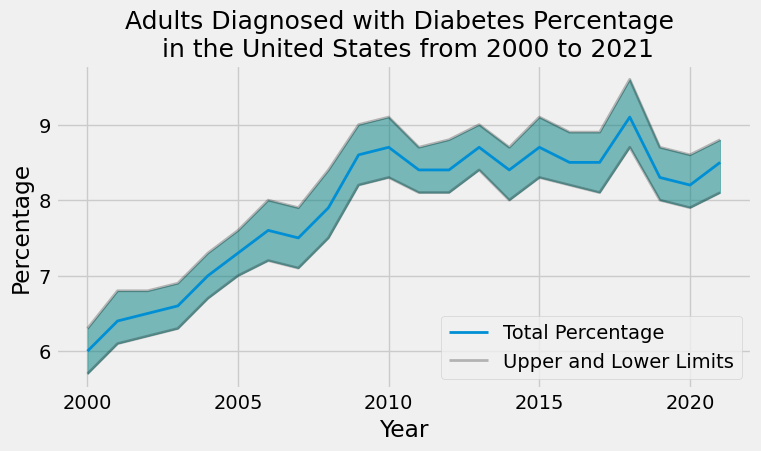

In [3]:
# Run this cell
figure = plt.figure(figsize = (8,4))
total = sns.lineplot(data = diabetes, x = "Year", y = "Total - Percentage", lw= 2, label ='Total Percentage')
lower = sns.lineplot(data = diabetes, x = "Year", y = "Total - Lower Limit", lw= 2, color = 'black', label ='Upper and Lower Limits', alpha = 0.25)
upper = sns.lineplot(data = diabetes, x = "Year", y = "Total - Upper Limit", lw= 2, color = 'black', alpha = 0.25)
line = upper.get_lines()
plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color = "teal", alpha = 0.5)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Adults Diagnosed with Diabetes Percentage \n in the United States from 2000 to 2021", fontsize = 18);

As we can see, our dataset provides us with both upper and lower limits of the percentage, so we can get an idea of what the range of the percentage value of adults diagnosed with Type-2 diabetes looks like. The light grey lines above represent those upper and lower limits in the dataset, and the teal shading between the limits shows us the range of possible values for the percentages, as it is quite possible for there to be some error in the datapoints.

Next, we can take a look at some of the other datasets provided by the CDC, including breakdown of percentages by sex, education level, and race/ethnicity.

### Diabetes Percentages by Sex

In [4]:
# Run this cell
diabetes_by_sex = pd.read_csv("data/diabetes_sex.csv")
diabetes_by_sex.head()

,Year,Male - Percentage,Male - Lower Limit,Male - Upper Limit,Female - Percentage,Female - Lower Limit,Female - Upper Limit
0,2000,6.4,6.0,6.9,5.6,5.2,6.0
1,2001,6.9,6.4,7.4,6.1,5.7,6.5
2,2002,7.2,6.7,7.8,6.0,5.6,6.4
3,2003,7.1,6.6,7.6,6.1,5.7,6.5
4,2004,7.5,7.1,8.0,6.5,6.1,6.9


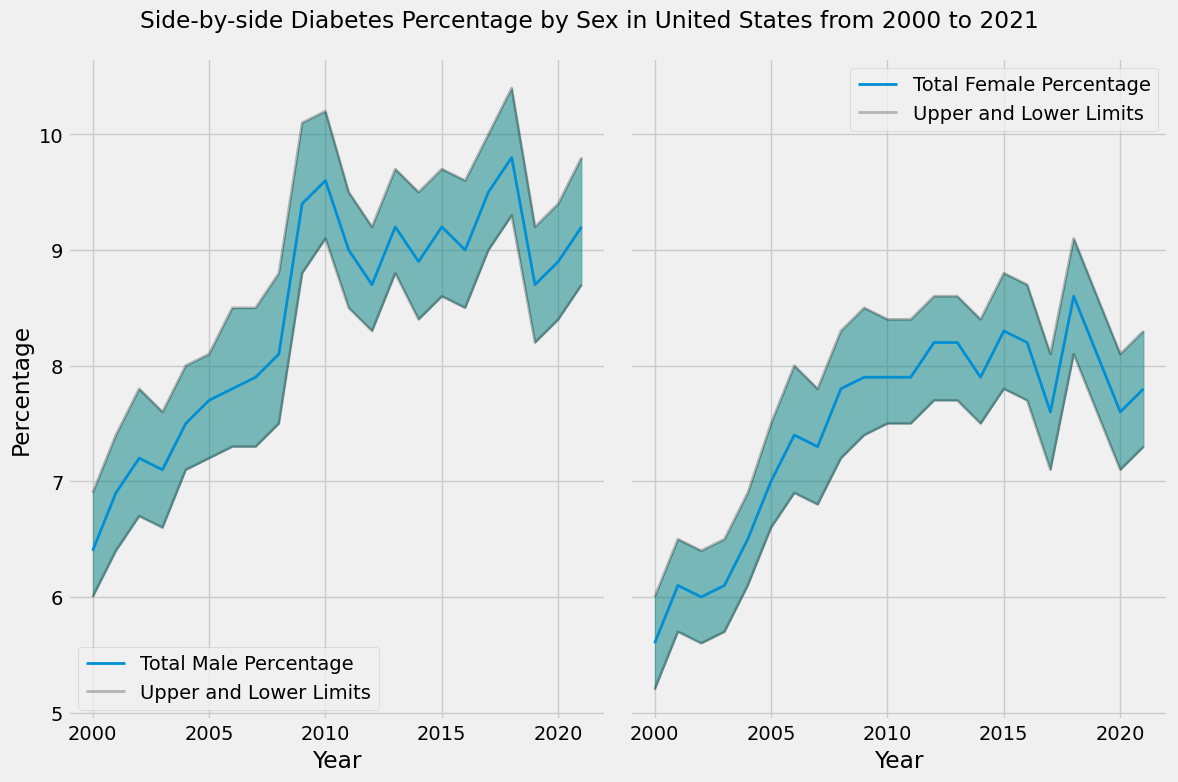

In [5]:
# Run this cell
# Plot side-by-side
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,8))

# Plot Male

total_male = sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Male - Percentage", lw = 2, label = 'Total Male Percentage', ax = ax[0])
lower_male = sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Male - Lower Limit", lw = 2, color = 'black', label ='Upper and Lower Limits', alpha = 0.25, ax = ax[0])
upper_male = sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Male - Upper Limit", lw = 2, color = 'black', alpha = 0.25, ax = ax[0])
line_male = upper_male.get_lines()
ax[0].fill_between(line_male[0].get_xdata(), line_male[1].get_ydata(), line_male[2].get_ydata(), color = "teal", alpha = 0.5)
ax[0].legend()
ax[0].set(ylabel = 'Percentage')

# Plot Female  

total_female = sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Female - Percentage", lw = 2, label = 'Total Female Percentage', ax = ax[1])
lower_female = sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Female - Lower Limit", lw = 2, color = 'black', label ='Upper and Lower Limits', alpha = 0.25, ax = ax[1])
upper_female = sns.lineplot(data = diabetes_by_sex, x = "Year", y = "Female - Upper Limit", lw = 2, color = 'black', alpha = 0.25, ax = ax[1])
line_female = upper_female.get_lines()
ax[1].fill_between(line_female[0].get_xdata(), line_female[1].get_ydata(), line_female[2].get_ydata(), color = "teal", alpha = 0.5)
ax[1].legend()

# Set titles
fig.suptitle("Side-by-side Diabetes Percentage by Sex in United States from 2000 to 2021")
fig.tight_layout()
fig.show();


As we can see from the side-by-side plot, the percentage of male adults diagnosed with type 2 diabetes is higher than that of female adults diagnosed.

It is important to note, as we have been in the past few notebooks, to take note of who is not represented in this representation of sex that has been determined by the U.S. Census. The inability to properly represent any characteristic about human beings that is not perfectly binary or easy to split among categories has always been and likely will continue to be an issue in data collection and management, especially with regards to medical data.

### Diabetes Percentages by Education Level

Next, we will take a look at another demographic category represented in a dataset provided by the CDC: education level. The way in which this data represented, as well as the implications that its inclusion bring about, are probably the most important and interesting aspects about these datasets to discuss.

In [6]:
# Run this cell
diabetes_by_edu = pd.read_csv("data/diabetes_education.csv")
diabetes_by_edu.head()

,Year,< High School - Percentage,< High School - Lower Limit,< High School - Upper Limit,High School - Percentage,High School - Lower Limit,High School - Upper Limit,> High School - Percentage,> High School - Lower Limit,> High School - Upper Limit
0,2000,9.2,8.4,10.1,5.9,5.4,6.5,4.8,4.4,5.1
1,2001,9.8,8.9,10.8,7.0,6.4,7.6,4.9,4.5,5.2
2,2002,9.8,8.9,10.7,6.9,6.3,7.4,5.3,4.9,5.7
3,2003,9.2,8.4,10.1,6.1,5.6,6.7,5.9,5.5,6.3
4,2004,9.8,9.1,10.6,7.1,6.6,7.7,5.9,5.4,6.3


As we can see from the table above, there are only three categories in which the individuals can be placed: `< High School`, `High School`, and `> High School`, referring to individuals who have completed less education than the high school level, the high school level, and more education than high school, respectively. If this were another dataset, in which education might actually be a relevant feature to be looking into, we could see the problems that these limited categories could cause.

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 2.1:
**What do you think the purpose is of including education level as a characteristic of these individuals? What would the education level likely be representing about the individuals diagnosed with type 2 diabetes? What harmful implications or generalizations could this representation cause?**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->

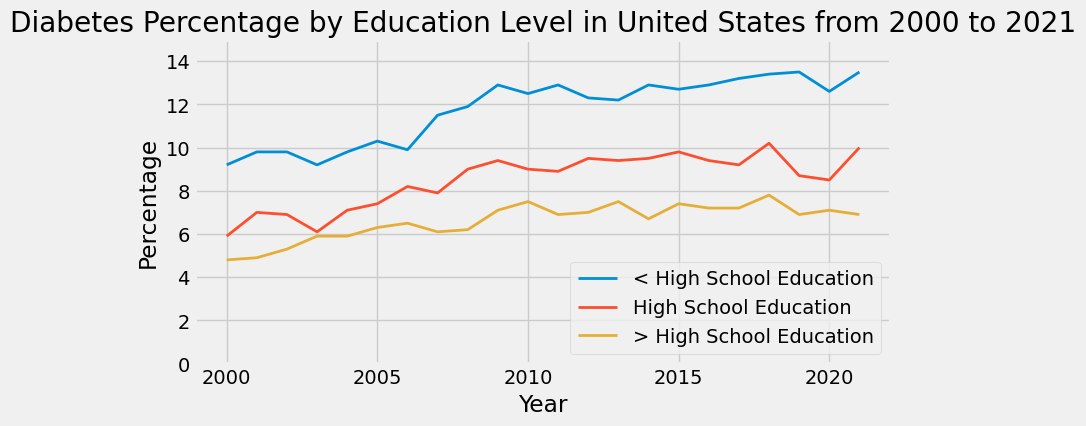

In [7]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = diabetes_by_edu, x = "Year", y = "< High School - Percentage", lw = 2, label ='< High School Education')
sns.lineplot(data = diabetes_by_edu, x = "Year", y = "High School - Percentage", lw = 2, label = 'High School Education')
sns.lineplot(data = diabetes_by_edu, x = "Year", y = "> High School - Percentage", lw = 2, label ='> High School Education')
plt.legend(loc = "lower right")
plt.ylim([0, 15])
plt.ylabel("Percentage");
plt.title("Diabetes Percentage by Education Level in United States from 2000 to 2021");

From this, we can see a graph that shows people with lower education levels having a higher percentage diagnosed, while people with higher education levels having the lowest percentage diagnosed. Again, it is important to consider what implications are being stated through this representation, and how this representation may be vastly misleading.

### Diabetes Percentages by Race/Ethnicity

Finally, we'll be looking into the representation of the breakdown of diabetes diagnoses percentages among different races/ethnicities.

We have seen consistently throughout our previous notebooks that the way that race/ethnicity is represented by the Census and every other governmental dataset is highly misrepresentative, and it forces people into categories when race/ethnicity is not always something that can easily (or should) be divided into boxes.

In [8]:
# Run this cell
diabetes_by_re = pd.read_csv("data/diabetes_re.csv")
diabetes_by_re.head()

,Year,Hispanic - Percentage,Hispanic - Lower Limit,Hispanic - Upper Limit,Non-Hispanic White - Percentage,Non-Hispanic White - Lower Limit,Non-Hispanic White - Upper Limit,Non-Hispanic Black - Percentage,Non-Hispanic Black - Lower Limit,Non-Hispanic Black - Upper Limit,Non-Hispanic Asian - Percentage,Non-Hispanic Asian - Lower Limit,Non-Hispanic Asian - Upper Limit
0,2000,8.8,7.9,9.8,5.2,4.9,5.5,10.1,9.1,11.1,4.5,2.9,6.9
1,2001,9.2,8.2,10.2,5.6,5.3,6.0,10.3,9.3,11.3,5.0,3.4,7.2
2,2002,9.2,8.2,10.4,5.8,5.4,6.1,9.9,8.9,10.9,6.2,4.6,8.4
3,2003,8.5,7.6,9.6,5.9,5.5,6.2,10.0,9.1,11.1,6.3,4.6,8.4
4,2004,10.1,9.1,11.2,6.0,5.7,6.3,11.1,10.1,12.1,7.5,5.8,9.7


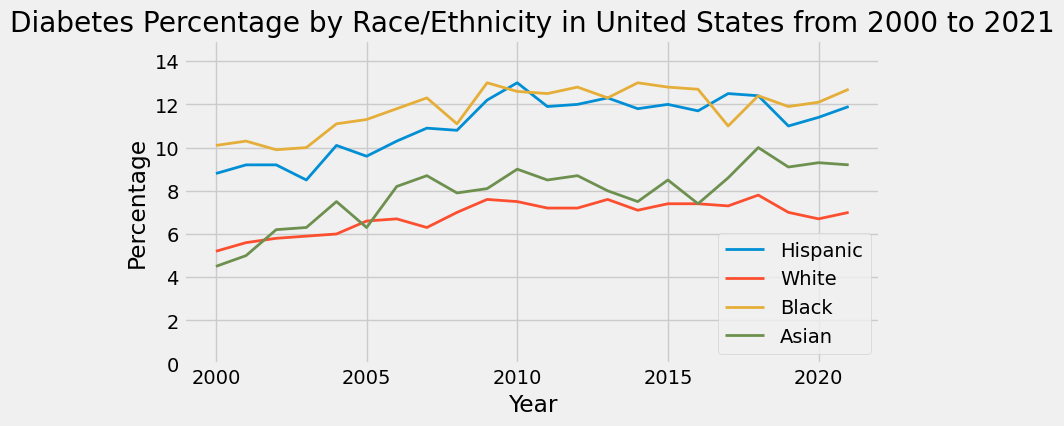

In [9]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = diabetes_by_re, x = "Year", y = "Hispanic - Percentage", lw = 2, label ='Hispanic')
sns.lineplot(data = diabetes_by_re, x = "Year", y = "Non-Hispanic White - Percentage", lw = 2, label = 'White')
sns.lineplot(data = diabetes_by_re, x = "Year", y = "Non-Hispanic Black - Percentage", lw = 2, label = 'Black')
sns.lineplot(data = diabetes_by_re, x = "Year", y = "Non-Hispanic Asian - Percentage", lw = 2, label = 'Asian')
plt.ylim([0, 15])
plt.ylabel("Percentage");
plt.title('Diabetes Percentage by Race/Ethnicity in United States from 2000 to 2021');

The information provided by this visualization is one that we commonly see in visualizations of medical data (particularly when the data is about diseases or health conditions) broken down by race/ethnicity -- Hispanic and Black people are diagnosed with type 2 diabetes at higher percentages than White and Asian people. 

### Summary of Demographic Breakdown

As we have seen in the past three notebooks, much of the time that we take a look at the "demographic breakdown" of medical data, there are important and harmful implicatons that come from the way we represent this data in the form of numbers and distinct categories. As it turns out, much of the information that we have about ourselves, even things that seem relatively easy to state about ourselves such as our sex/gender, race/ethnicity, and education level, is not easily broken up into a few simple categories, and it does not and should not put us into categories in which, for example, the percentage of individuals sharing our "identity" have a higher percentage of some disease than others. 

We hope that the repeated cases looking at this type of information and data has been helpful in demonstrating some of the issues that come with representing characteristics about ourself in our medical data.

--------------------
# 3. Looking at Geographical Breakdowns of Diabetes Data  <a id='2'></a>

Next, we will be taking a look at the dataset containing information about the yearly type 2 diabetes diagnoses in each state of the United States (as well as the Distric of Columbia). From this data, we can look into how the percentage of diabetes diagnoses varies greatly from region to region across the U.S.

In [10]:
# Run this cell
diabetes_states = pd.read_csv("data/diabetes_states.csv")
diabetes_states.head()

,Year,State,Region,Percentage
0,2000,Alabama,South,7.3
1,2000,Alaska,West,4.4
2,2000,Arizona,West,5.9
3,2000,Arkansas,South,5.9
4,2000,California,West,7.1


In [11]:
# Run this cell
diabetes_states = diabetes_states.astype({"Percentage": float})

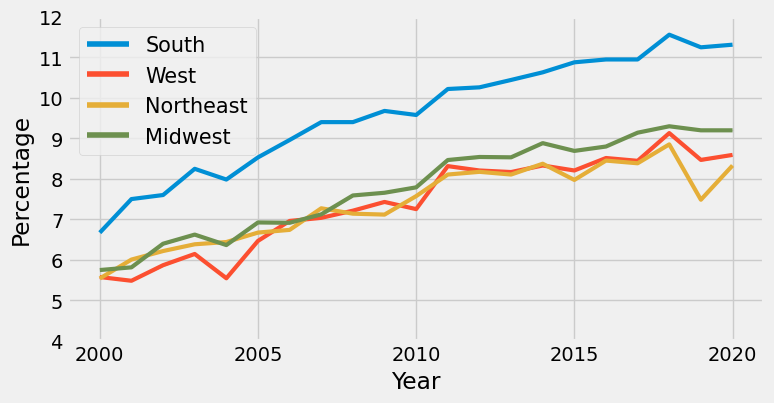

In [12]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = diabetes_states, x = "Year", y = "Percentage", hue = "Region", ci = False, lw = 3)
plt.ylim([4, 12]);
plt.xticks(ticks = [2000, 2005, 2010, 2015, 2020]);
plt.legend(fontsize = 15);

From this graph, we can see immediately that there is a discrepancy in the type 2 diabetes diagnoses percentages across the different regions of the U.S.

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 3.1:
**Do a bit of research into the rates of type 2 diabetes in the different regions of the United States, and see if you can find any factors that may be contributing to this discrepancy. Why is it important for us to be considering how certain areas of the United States are more affected by a medical condition than others?**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->
Below, we have created a widget for you to take a look at the yearly percentage of type 2 diabetes diagnoses in any state of your choosing.

In [13]:
# Run this cell
def plot_by_state(state):
    "Create a lineplot for percentages of diabetes diagnoses for adults in different states"
    plt.figure(figsize = (8,4))  
    plot = sns.lineplot(data = diabetes_states[diabetes_states["State"] == state], x = 'Year', y = 'Percentage', ci = False) 
    plt.ylim([4, 15]);
    plt.xticks(ticks = [2000, 2005, 2010, 2015, 2020]);
    plt.title('Yearly Percentage of Adults Diagnosed \n with Type 2 Diabetes in ' + state);


def state_dropdown_widget():
    dropdown = widgets.Dropdown(
        options = diabetes_states["State"].unique(),
        value = 'Alabama',
        description = 'State:',
        disabled = False
    )
    return dropdown

dropdown = state_dropdown_widget()
dropdown

# Creates an interactive plot by country
interact(plot_by_state, state = dropdown);

interactive(children=(Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cal…

In this notebook we only considered the data of diabetes diagnoses in the United States, primarily because there would be an incredible amount of data to look at if we considered other countries, but you may find it useful and interesting to take a look at how certain countries may have higher percentages of adults diagnosed with type 2 diabetes. Diabetes does not only affect the United States, and it would be misleading and misrepresentative to completely ignore how other countries may be affected by it as well.

--------------------
# 4. Utilizing Google Searches to Learn More <a id='3'></a>

In this section, we'll be doing some exploration of the information that Google can tell us with regards to medical conditions, diagnoses, and data. To do so, we'll be using [Google Trends](https://trends.google.com/trends/explore), a helpful tool that allows us to look at how different search terms and queries have trended over time.

As a first example, we can take a look at the search term `Type 2 diabetes`, to see how that search term has performed over time, the subregions in the United States where it has trended the most, and the most related search queries to the term.

<img src="data/diabetes_1.png" width=800 height=600 />

As we can see from this screenshot, after changing the dropdown filters to be looking at the United States and all the years from 2004 - the present, there has been a slow upward trend of people searching the term `Type 2 diabetes` on Google.

<img src="data/diabetes_2.png" width=800 height=500 />

Next, we can take a look at the relative interest in this search term by state (we can see Mississippi setting the bar for the highest relative interest in this search term), and right underneath that, we see both the related topics and related queries. It is best to take a look at the "Top" related topics and queries, because the "Rising" related topics and queries tend to only be primarily reflecting what has been trending recently (but feel free to look at the "Rising" topics and queries anyway!).

Finally, another helpful function is being able to compare multiple search terms to see how they have trended at the same time.

<img src="data/diabetes_3.png" width=800 height=600 />

This was a short introduction to some of the most interesting and useful features of Google Trends, but now it's your turn! Feel free to explore different search topics and queries related to type 2 diabetes, primarily taking a look at what kinds of trends you can find regarding the symptoms of type 2 diabetes as well as its treatments. You can use some of, all of, or more than the features that we discussed.

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 4.1:
**Summarize any interesting results that you found from messing around with Google Trends. You can talk about any queries you tried, which terms resulted in higher percentages than you expected, which terms resulted in lower percentages that you thought might result in more, or anything else that you found interesting while looking through the trends!**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->
-------------------------
# Congratulations! You Have Completed Notebook 3.

We hope this notebook gave you a fun and interesting look into different data analysis and visualization techniques for exploring diabetes data. In the final notebook, we'll be exploring and asking questions about substance use epidemiology. Below, you will find instructions on how to generate a PDF of your written responses to submit!

---------------
# 5. Submitting Your Work  <a id='4'></a>

**Make sure that you've answered all the questions.**

Follow these steps: 
1. Go to `File` in the menu bar, then select `Save and Checkpoint` (or press CTRL+S on the keyboard).
2. Go to `Cell` in the menu bar, then select `Run All`.
3. Click the link produced by the code cell below.
4. Submit the downloaded PDF on bCourses according to your professor's instructions.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply click `File` in the menu, find `Download As`, and choose `PDF via LaTeX (.pdf)` to save a copy of your PDF onto your computer. Alternatively, you can also right click the link and save the link content as a PDF.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [14]:
# Run this cell
# This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Notebook 3.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='Notebook 3.pdf' download>here</a> to open the PDF.<br></p>"))

------------------
# 6. Explore Data Science Opportunities  <a id='5'></a>

Interested in learning more about how to get involved in data science or coding for data analysis? The following resources might help support your learning:


- Data Science Modules: http://data.berkeley.edu/education/modules

- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings

- Data 8 Course Information: http://data8.org/

- Data 100 Course Information: https://ds100.org/

----------------------
# 7. Feedback Form  <a id='6'></a>

<div class="alert alert-info">
<b> We encourage student to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLScDK227bq_qLJDLsysk-UOEXy7G6_7YuYHGp2ogzeRBh4OvEw/viewform)